<a href="https://colab.research.google.com/github/MRUNIQUEGUPTA/Intern_Task/blob/main/Port_%26_Sail_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Given Data
data = {
    'id': [1, 2, 3, 4],
    'event': ['SOSP', 'EOSP', 'SOSP', 'EOSP'],
    'dateStamp': [43831, 43831, 43832, 43832],
    'timeStamp': [0.708333, 0.791667, 0.333333, 0.583333],
    'voyage_From': ['Port A', 'Port A', 'Port B', 'Port B'],
    'lat': [34.0522, 34.0522, 36.7783, 36.7783],
    'lon': [-118.2437, -118.2437, -119.4179, -119.4179],
    'imo_num': ['9434761', '9434761', '9434761', '9434761'],
    'voyage_Id': ['6', '6', '6', '6'],
    'allocatedVoyageId': [None, None, None, None]
}

df = pd.DataFrame(data)

In [ ]:
df

,id,event,dateStamp,timeStamp,voyage_From,lat,lon,imo_num,voyage_Id,allocatedVoyageId
0,1,SOSP,43831,0.708333,Port A,34.0522,-118.2437,9434761,6,None
1,2,EOSP,43831,0.791667,Port A,34.0522,-118.2437,9434761,6,None
2,3,SOSP,43832,0.333333,Port B,36.7783,-119.4179,9434761,6,None
3,4,EOSP,43832,0.583333,Port B,36.7783,-119.4179,9434761,6,None


In [ ]:
from datetime import datetime, timedelta

# Calculate precise UTC date-times for events
base_date = datetime(1899, 12, 30)
df['utc_date_time'] = df.apply(lambda row: base_date + timedelta(days=row['dateStamp'] - 2) + timedelta(days=row['timeStamp']), axis=1)

# Sort by utc_date_time
df = df.sort_values(by='utc_date_time').reset_index(drop=True)

# Show the updated dataframe with utc_date_time
print("\nDataFrame with UTC Date-Times:")
print(df)


DataFrame with UTC Date-Times:
   id event  dateStamp  timeStamp voyage_From      lat       lon  imo_num  \
0   1  SOSP      43831   0.708333      Port A  34.0522 -118.2437  9434761   
1   2  EOSP      43831   0.791667      Port A  34.0522 -118.2437  9434761   
2   3  SOSP      43832   0.333333      Port B  36.7783 -119.4179  9434761   
3   4  EOSP      43832   0.583333      Port B  36.7783 -119.4179  9434761   

  voyage_Id allocatedVoyageId              utc_date_time  
0         6              None 2019-12-30 16:59:59.971200  
1         6              None 2019-12-30 19:00:00.028800  
2         6              None 2019-12-31 07:59:59.971200  
3         6              None 2019-12-31 13:59:59.971200  


In [ ]:
# Add previous event and timestamp columns
df['prev_event'] = df['event'].shift(1)
df['prev_utc_date_time'] = df['utc_date_time'].shift(1)

# Calculate durations between events
df['duration_minutes'] = (df['utc_date_time'] - df['prev_utc_date_time']).dt.total_seconds() / 60

# Initialize columns for sailing time and port stay time
df['sailing_time_minutes'] = 0
df['port_stay_time_minutes'] = 0

# Calculate sailing and port stay times
df.loc[(df['event'] == 'EOSP') & (df['prev_event'] == 'SOSP'), 'sailing_time_minutes'] = df['duration_minutes']
df.loc[(df['event'] == 'SOSP') & (df['prev_event'] == 'EOSP'), 'port_stay_time_minutes'] = df['duration_minutes']

# Show the updated dataframe with calculated durations
print("\nDataFrame with Calculated Durations:")
print(df)


DataFrame with Calculated Durations:
   id event  dateStamp  timeStamp voyage_From      lat       lon  imo_num  \
0   1  SOSP      43831   0.708333      Port A  34.0522 -118.2437  9434761   
1   2  EOSP      43831   0.791667      Port A  34.0522 -118.2437  9434761   
2   3  SOSP      43832   0.333333      Port B  36.7783 -119.4179  9434761   
3   4  EOSP      43832   0.583333      Port B  36.7783 -119.4179  9434761   

  voyage_Id allocatedVoyageId              utc_date_time prev_event  \
0         6              None 2019-12-30 16:59:59.971200       None   
1         6              None 2019-12-30 19:00:00.028800       SOSP   
2         6              None 2019-12-31 07:59:59.971200       EOSP   
3         6              None 2019-12-31 13:59:59.971200       SOSP   

          prev_utc_date_time  duration_minutes  sailing_time_minutes  \
0                        NaT               NaN               0.00000   
1 2019-12-30 16:59:59.971200         120.00096             120.00096   
2 20

,id,event,dateStamp,timeStamp,voyage_From,lat,lon,imo_num,voyage_Id,allocatedVoyageId,utc_date_time,prev_event,prev_utc_date_time,duration_minutes
0,1,SOSP,43831,0.708333,Port A,34.0522,-118.2437,9434761,6,None,2019-12-30 16:59:59.971200,None,NaT,NaN
1,2,EOSP,43831,0.791667,Port A,34.0522,-118.2437,9434761,6,None,2019-12-30 19:00:00.028800,SOSP,2019-12-30 16:59:59.971200,120.00096
2,3,SOSP,43832,0.333333,Port B,36.7783,-119.4179,9434761,6,None,2019-12-31 07:59:59.971200,EOSP,2019-12-30 19:00:00.028800,779.99904
3,4,EOSP,43832,0.583333,Port B,36.7783,-119.4179,9434761,6,None,2019-12-31 13:59:59.971200,SOSP,2019-12-31 07:59:59.971200,360.00000


In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0 # Earth radius in kilometers
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c # in kilometers
    return distance * 0.539957 # convert to nautical miles

# Calculate distances between consecutive ports
df['prev_lat'] = df['lat'].shift(1)
df['prev_lon'] = df['lon'].shift(1)
df['distance_travelled'] = df.apply(lambda row: haversine(row['prev_lat'], row['prev_lon'], row['lat'], row['lon']) if pd.notnull(row['prev_lat']) else 0, axis=1)

# Show the updated dataframe with calculated distances
print("\nDataFrame with Calculated Distances:")
print(df)


DataFrame with Calculated Distances:
   id event  dateStamp  timeStamp voyage_From      lat       lon  imo_num  \
0   1  SOSP      43831   0.708333      Port A  34.0522 -118.2437  9434761   
1   2  EOSP      43831   0.791667      Port A  34.0522 -118.2437  9434761   
2   3  SOSP      43832   0.333333      Port B  36.7783 -119.4179  9434761   
3   4  EOSP      43832   0.583333      Port B  36.7783 -119.4179  9434761   

  voyage_Id allocatedVoyageId              utc_date_time prev_event  \
0         6              None 2019-12-30 16:59:59.971200       None   
1         6              None 2019-12-30 19:00:00.028800       SOSP   
2         6              None 2019-12-31 07:59:59.971200       EOSP   
3         6              None 2019-12-31 13:59:59.971200       SOSP   

          prev_utc_date_time  duration_minutes  sailing_time_minutes  \
0                        NaT               NaN               0.00000   
1 2019-12-30 16:59:59.971200         120.00096             120.00096   
2 20

In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0 # Earth radius in kilometers
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c # in kilometers
    return distance * 0.539957 # convert to nautical miles

# Calculate distances between consecutive ports
df['prev_lat'] = df['lat'].shift(1)
df['prev_lon'] = df['lon'].shift(1)
df['distance_travelled'] = df.apply(lambda row: haversine(row['prev_lat'], row['prev_lon'], row['lat'], row['lon']) if pd.notnull(row['prev_lat']) else 0, axis=1)

total_distance = df['distance_travelled'].sum()
print(f'Total Distance Travelled: {total_distance} nautical miles')


Total Distance Travelled: 173.46310108647606 nautical miles


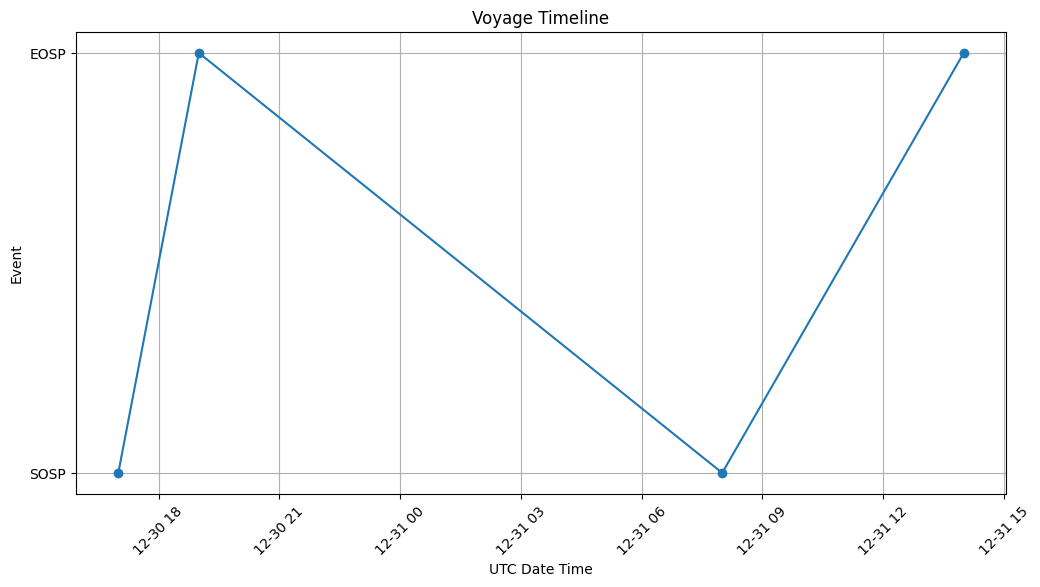

In [ ]:
import matplotlib.pyplot as plt

# Plot timeline of events
plt.figure(figsize=(12, 6))
plt.plot(df['utc_date_time'], df['event'], marker='o', linestyle='-')
plt.xlabel('UTC Date Time')
plt.ylabel('Event')
plt.title('Voyage Timeline')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()